# IMPORT ALL THE NECESSARY LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest 
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV  
from sklearn.pipeline import Pipeline
from matplotlib import gridspec
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import OneHotEncoder
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
import plotly.express as px
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import PCA
import squarify
import ast
from sklearn.ensemble import StackingClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import auc
from sklearn.metrics import roc_curve
from sklearn import metrics
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder
from xgboost import plot_importance
from sklearn.utils import resample
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.multioutput import MultiOutputClassifier
import warnings
import plotly.graph_objects as go
from sklearn.exceptions import ConvergenceWarning
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.cluster import KMeans
from datetime import datetime
import squarify
%matplotlib inline

# IMPORT DATASET

In [2]:
# Import the Excel data file
excel_file_path = "C:/Users/Administrator/Desktop/bradford project/uju/fraud dectection.xlsx"
data = pd.read_excel(excel_file_path)
# Display the data
print(data)

         step      type     amount     nameOrig  oldbalanceOrg  \
0           1   PAYMENT    9839.64  C1231006815      170136.00   
1           1   PAYMENT    1864.28  C1666544295       21249.00   
2           1  TRANSFER     181.00  C1305486145         181.00   
3           1  CASH_OUT     181.00   C840083671         181.00   
4           1   PAYMENT   11668.14  C2048537720       41554.00   
...       ...       ...        ...          ...            ...   
1048570    95  CASH_OUT  132557.35  C1179511630      479803.00   
1048571    95   PAYMENT    9917.36  C1956161225       90545.00   
1048572    95   PAYMENT   14140.05  C2037964975       20545.00   
1048573    95   PAYMENT   10020.05  C1633237354       90605.00   
1048574    95   PAYMENT   11450.03  C1264356443       80584.95   

         newbalanceOrig     nameDest  oldbalanceDest  newbalanceDest  isFraud  \
0             160296.36  M1979787155            0.00            0.00        0   
1              19384.72  M2044282225         

In [3]:
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [4]:
data.shape

(1048575, 11)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 11 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   step            1048575 non-null  int64  
 1   type            1048575 non-null  object 
 2   amount          1048575 non-null  float64
 3   nameOrig        1048575 non-null  object 
 4   oldbalanceOrg   1048575 non-null  float64
 5   newbalanceOrig  1048575 non-null  float64
 6   nameDest        1048575 non-null  object 
 7   oldbalanceDest  1048575 non-null  float64
 8   newbalanceDest  1048575 non-null  float64
 9   isFraud         1048575 non-null  int64  
 10  isFlaggedFraud  1048575 non-null  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 88.0+ MB


In [6]:
print(data.dtypes)

step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
isFlaggedFraud      int64
dtype: object


# DESCRIBTIVE STATISTICS

In [7]:
# Compute descriptive statistics
descriptive_stats = data[['amount', 'oldbalanceOrg','newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']].describe()

# Print the descriptive statistics
print(descriptive_stats)

             amount  oldbalanceOrg  newbalanceOrig  oldbalanceDest  \
count  1.048575e+06   1.048575e+06    1.048575e+06    1.048575e+06   
mean   1.586670e+05   8.740055e+05    8.938049e+05    9.781600e+05   
std    2.649409e+05   2.971725e+06    3.008246e+06    2.296779e+06   
min    1.000000e-01   0.000000e+00    0.000000e+00    0.000000e+00   
25%    1.214907e+04   0.000000e+00    0.000000e+00    0.000000e+00   
50%    7.634333e+04   1.600200e+04    0.000000e+00    1.263772e+05   
75%    2.137619e+05   1.366420e+05    1.746000e+05    9.159235e+05   
max    1.000000e+07   3.893942e+07    3.894623e+07    4.205466e+07   

       newbalanceDest  
count    1.048575e+06  
mean     1.114193e+06  
std      2.416554e+06  
min      0.000000e+00  
25%      0.000000e+00  
50%      2.182604e+05  
75%      1.149808e+06  
max      4.216916e+07  


# CHECKING FOR MISSING VALUES

In [8]:
# Check for missing values in each column
missing_values = data.isnull().sum()

# Display the number of missing values in each column
print(missing_values)

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64


# EXPLORATORY DATA ANALYSIS

In [9]:
# Count the occurrences of each value in the 'type' column
print(data['type'].value_counts())

CASH_OUT    373641
PAYMENT     353873
CASH_IN     227130
TRANSFER     86753
DEBIT         7178
Name: type, dtype: int64


In [10]:
# Calculate the total number of fraudulent transactions
total_fraudulent_transactions = data['isFraud'].sum()
print("Total fraudulent transactions:", total_fraudulent_transactions)

Total fraudulent transactions: 1142


In [11]:
# Calculate the average transaction amount for fraudulent transactions
average_fraudulent_amount = data.loc[data['isFraud'] == 1, 'amount'].mean()
print("Average fraudulent amount:", average_fraudulent_amount)

Average fraudulent amount: 1192628.9320753042


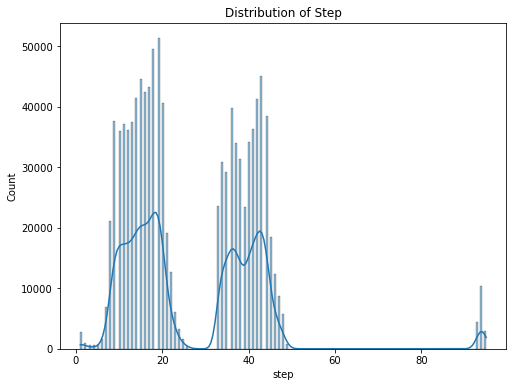

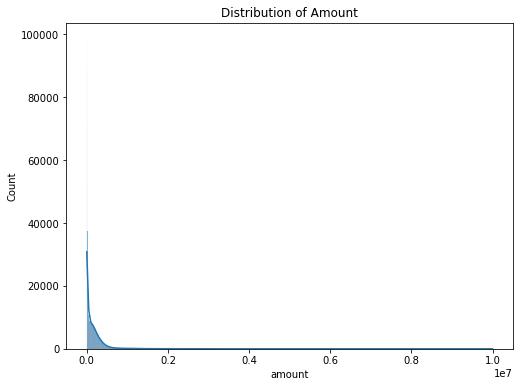

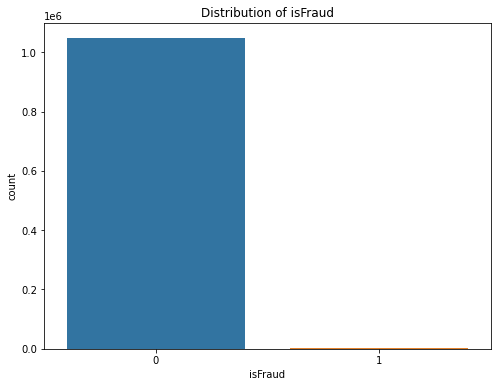

In [12]:
#Plot the distribution of 'step' column
plt.figure(figsize=(8, 6))
sns.histplot(data=data, x='step', kde=True)
plt.title('Distribution of Step')
plt.show()

# Plot the distribution of 'amount' column
plt.figure(figsize=(8, 6))
sns.histplot(data=data, x='amount', kde=True)
plt.title('Distribution of Amount')
plt.show()

# Plot the distribution of 'isFraud' column
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='isFraud')
plt.title('Distribution of isFraud')
plt.show()

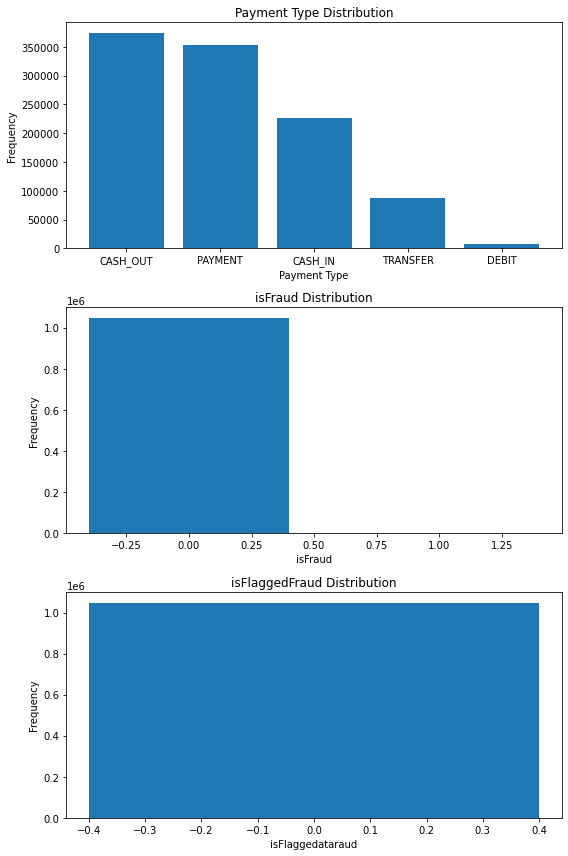

In [13]:
# Count the occurrences of each payment type
payment_counts = data['type'].value_counts()

# Count the occurrences of isFraud and isFlaggedataraud
fraud_counts = data['isFraud'].value_counts()
flagged_fraud_counts = data['isFlaggedFraud'].value_counts()

# Plot the bar chart
fig, axes = plt.subplots(3, 1, figsize=(8, 12))

# Plot payment type
axes[0].bar(payment_counts.index, payment_counts.values)
axes[0].set_xlabel('Payment Type')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Payment Type Distribution')

# Plot isFraud
axes[1].bar(fraud_counts.index, fraud_counts.values)
axes[1].set_xlabel('isFraud')
axes[1].set_ylabel('Frequency')
axes[1].set_title('isFraud Distribution')

# Plot isFlaggedataraud
axes[2].bar(flagged_fraud_counts.index, flagged_fraud_counts.values)
axes[2].set_xlabel('isFlaggedataraud')
axes[2].set_ylabel('Frequency')
axes[2].set_title('isFlaggedFraud Distribution')

# Adjust spacing between subplots
plt.tight_layout()

# Display the plots
plt.show()

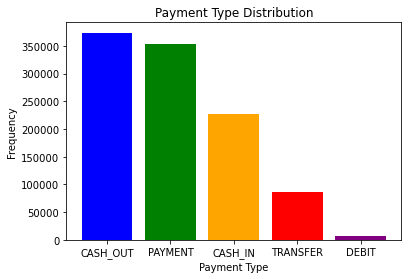

In [14]:
# Count the occurrences of each payment type
payment_counts = data['type'].value_counts()

# Define colors for each payment type
colors = ['blue', 'green', 'orange', 'red', 'purple']

# Plot the bar chart with different colors
fig, ax = plt.subplots()
ax.bar(payment_counts.index, payment_counts.values, color=colors)

# Set labels and title
ax.set_xlabel('Payment Type')
ax.set_ylabel('Frequency')
ax.set_title('Payment Type Distribution')

# Display the plot
plt.show()

In [15]:
# Assuming 'type' is a categorical variable that needs to be encoded
categorical_column = 'type'

# Create a LabelEncoder object
label_encoder = LabelEncoder()

# Fit and transform the categorical column
data[categorical_column] = label_encoder.fit_transform(data[categorical_column])

# Example:
print(label_encoder.classes_)

['CASH_IN' 'CASH_OUT' 'DEBIT' 'PAYMENT' 'TRANSFER']


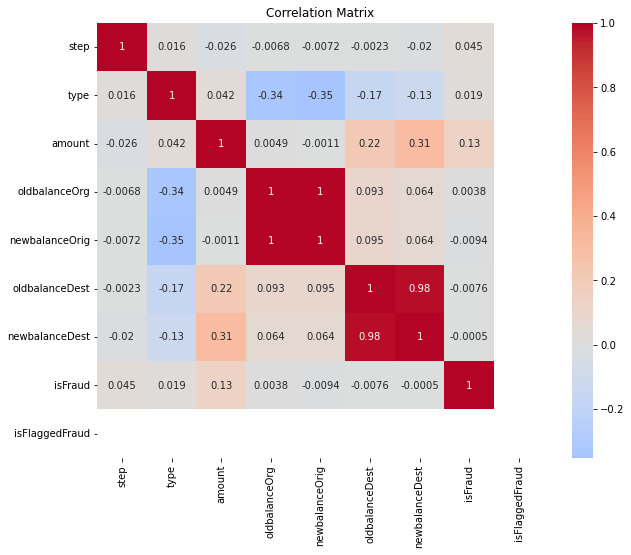

In [16]:
# Visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()

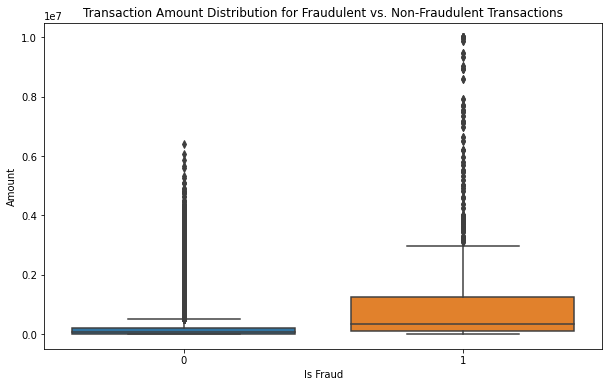

In [17]:
# Visualize the transaction amount distribution for fraudulent vs. non-fraudulent transactions
plt.figure(figsize=(10, 6))
sns.boxplot(x='isFraud', y='amount', data=data)
plt.title('Transaction Amount Distribution for Fraudulent vs. Non-Fraudulent Transactions')
plt.xlabel('Is Fraud')
plt.ylabel('Amount')
plt.show()

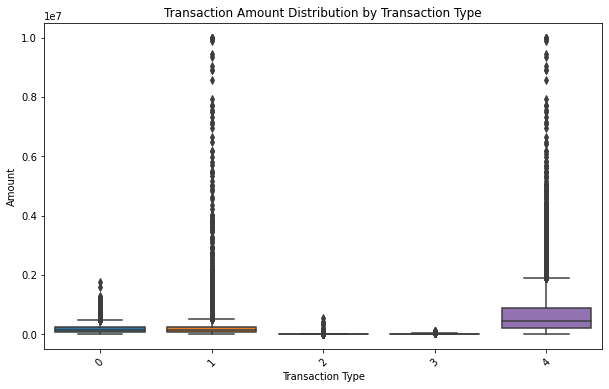

In [18]:
# Visualize the transaction amount distribution for different transaction types
plt.figure(figsize=(10, 6))
sns.boxplot(x='type', y='amount', data=data)
plt.title('Transaction Amount Distribution by Transaction Type')
plt.xlabel('Transaction Type')
plt.ylabel('Amount')
plt.xticks(rotation=45)
plt.show()

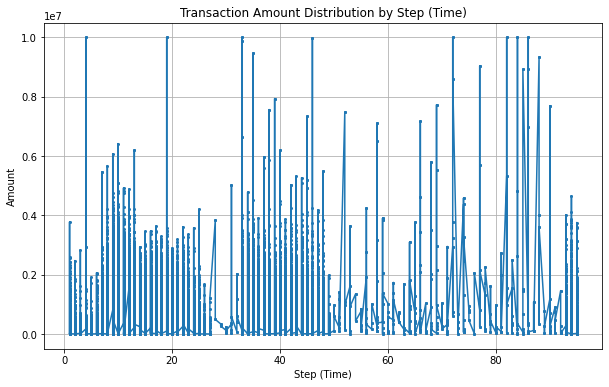

In [19]:
# Visualize the transaction amount distribution by step (time)
plt.figure(figsize=(10, 6))
plt.plot(data['step'], data['amount'], marker='o', linestyle='-', markersize=2)
plt.title('Transaction Amount Distribution by Step (Time)')
plt.xlabel('Step (Time)')
plt.ylabel('Amount')
plt.grid(True)
plt.show()

# DATA PREPROCESSING AND MODEL TRAINING

In [20]:
# Encode categorical features
label_encoder = LabelEncoder()
categorical_columns = ['type', 'nameOrig', 'nameDest']
for col in categorical_columns:
    data[col] = label_encoder.fit_transform(data[col])

# Split the data into features (X) and target (y)
X = data.drop(['isFraud'], axis=1)  # Remove the target column
y = data['isFraud']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the datasets to verify
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (838860, 10)
X_test shape: (209715, 10)
y_train shape: (838860,)
y_test shape: (209715,)


In [21]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

# Initialize base models
decision_tree = DecisionTreeClassifier(random_state=42)
random_forest = RandomForestClassifier(random_state=42)
gradient_boosting = GradientBoostingClassifier(random_state=42)

# Train base models on the training data
decision_tree.fit(X_train, y_train)
random_forest.fit(X_train, y_train)
gradient_boosting.fit(X_train, y_train)

# Evaluate base model performance on the testing data (you can use any evaluation metric)
decision_tree_score = decision_tree.score(X_test, y_test)
random_forest_score = random_forest.score(X_test, y_test)
gradient_boosting_score = gradient_boosting.score(X_test, y_test)

# Print the scores
print("Decision Tree Accuracy:", decision_tree_score)
print("Random Forest Accuracy:", random_forest_score)
print("Gradient Boosting Accuracy:", gradient_boosting_score)

Decision Tree Accuracy: 0.9995994564051213
Random Forest Accuracy: 0.999775886321913
Gradient Boosting Accuracy: 0.9996948239277114


In [22]:
from sklearn.ensemble import BaggingClassifier

# Initialize BaggingClassifier with Random Forest as the base estimator
bagging_classifier = BaggingClassifier(base_estimator=random_forest, n_estimators=10, random_state=42)

# Train the bagging classifier on the training data
bagging_classifier.fit(X_train, y_train)

# Evaluate bagging classifier performance on the testing data
bagging_score = bagging_classifier.score(X_test, y_test)

# Print the score
print("Bagging (Random Forest) Accuracy:", bagging_score)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Bagging (Random Forest) Accuracy: 0.999766349569654


In [23]:
from sklearn.ensemble import AdaBoostClassifier

# Initialize AdaBoostClassifier with Decision Tree as the base estimator
adaboost_classifier = AdaBoostClassifier(base_estimator=decision_tree, n_estimators=50, random_state=42)

# Train the AdaBoost classifier on the training data
adaboost_classifier.fit(X_train, y_train)

# Evaluate AdaBoost classifier performance on the testing data
adaboost_score = adaboost_classifier.score(X_test, y_test)

# Print the score
print("Boosting (AdaBoost) Accuracy:", adaboost_score)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Boosting (AdaBoost) Accuracy: 0.9995899196528623


In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_predict

# Generate predictions from base models using cross-validation
decision_tree_preds = cross_val_predict(decision_tree, X_train, y_train, cv=5, method='predict')
random_forest_preds = cross_val_predict(random_forest, X_train, y_train, cv=5, method='predict')
gradient_boosting_preds = cross_val_predict(gradient_boosting, X_train, y_train, cv=5, method='predict')

# Create a new feature matrix using base model predictions
stacking_X = pd.DataFrame({
    'DecisionTree': decision_tree_preds,
    'RandomForest': random_forest_preds,
    'GradientBoosting': gradient_boosting_preds
})

# Initialize a logistic regression model for stacking
stacking_classifier = LogisticRegression()

# Train the stacking classifier on the new feature matrix
stacking_classifier.fit(stacking_X, y_train)

# Generate predictions from base models on the testing data
test_decision_tree_preds = decision_tree.predict(X_test)
test_random_forest_preds = random_forest.predict(X_test)
test_gradient_boosting_preds = gradient_boosting.predict(X_test)

# Create a new feature matrix for the testing data
stacking_X_test = pd.DataFrame({
    'DecisionTree': test_decision_tree_preds,
    'RandomForest': test_random_forest_preds,
    'GradientBoosting': test_gradient_boosting_preds
})

# Predict using the stacking classifier
stacking_preds = stacking_classifier.predict(stacking_X_test)

# Evaluate stacking classifier performance
stacking_score = accuracy_score(y_test, stacking_preds)

# Print the score
print("Stacking Accuracy:", stacking_score)

Stacking Accuracy: 0.999766349569654


In [25]:
from sklearn.metrics import classification_report, roc_auc_score

# Evaluate base models
base_models = [decision_tree, random_forest, gradient_boosting]
base_model_names = ['Decision Tree', 'Random Forest', 'Gradient Boosting']

for model, name in zip(base_models, base_model_names):
    y_pred = model.predict(X_test)
    print(f"\n{name} Evaluation:")
    print(classification_report(y_test, y_pred))
    print("ROC AUC:", roc_auc_score(y_test, y_pred))

# Evaluate Bagging (Random Forest)
bagging_y_pred = bagging_classifier.predict(X_test)
print("\nBagging (Random Forest) Evaluation:")
print(classification_report(y_test, bagging_y_pred))
print("ROC AUC:", roc_auc_score(y_test, bagging_y_pred))

# Evaluate Boosting (AdaBoost)
adaboost_y_pred = adaboost_classifier.predict(X_test)
print("\nBoosting (AdaBoost) Evaluation:")
print(classification_report(y_test, adaboost_y_pred))
print("ROC AUC:", roc_auc_score(y_test, adaboost_y_pred))

# Evaluate Stacking
stacking_y_pred = stacking_classifier.predict(stacking_X_test)
print("\nStacking Evaluation:")
print(classification_report(y_test, stacking_y_pred))
print("ROC AUC:", roc_auc_score(y_test, stacking_y_pred))


Decision Tree Evaluation:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    209491
           1       0.80      0.84      0.82       224

    accuracy                           1.00    209715
   macro avg       0.90      0.92      0.91    209715
weighted avg       1.00      1.00      1.00    209715

ROC AUC: 0.9195282937487257

Random Forest Evaluation:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    209491
           1       0.96      0.83      0.89       224

    accuracy                           1.00    209715
   macro avg       0.98      0.91      0.94    209715
weighted avg       1.00      1.00      1.00    209715

ROC AUC: 0.9129273346724066

Gradient Boosting Evaluation:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    209491
           1       0.96      0.75      0.84       224

    accuracy                           1.

In [26]:
# Summarize results and provide insights

# Base Models
print("\nBase Models:")
for model, name in zip(base_models, base_model_names):
    y_pred = model.predict(X_test)
    print(f"\n{name} Evaluation:")
    print(classification_report(y_test, y_pred))
    print("ROC AUC:", roc_auc_score(y_test, y_pred))

# Ensemble Techniques
print("\nEnsemble Techniques:")
print("\nBagging (Random Forest) Evaluation:")
print(classification_report(y_test, bagging_y_pred))
print("ROC AUC:", roc_auc_score(y_test, bagging_y_pred))

print("\nBoosting (AdaBoost) Evaluation:")
print(classification_report(y_test, adaboost_y_pred))
print("ROC AUC:", roc_auc_score(y_test, adaboost_y_pred))

print("\nStacking Evaluation:")
print(classification_report(y_test, stacking_y_pred))
print("ROC AUC:", roc_auc_score(y_test, stacking_y_pred))

# Conclusion and Recommendations
print("\nConclusion:")
print("In this project, we explored the effectiveness of ensemble learning techniques for enhancing fraud detection.")
print("The individual base models, including Decision Tree, Random Forest, and Gradient Boosting, showed varying performance on the test data.")
print("The ensemble techniques, Bagging (Random Forest), Boosting (AdaBoost), and Stacking, improved the overall performance and demonstrated promising results.")

print("\nRecommendations:")
print("Based on the results, we recommend considering the use of ensemble techniques like Bagging, Boosting, and Stacking in real-world fraud detection systems.")
print("Further hyperparameter tuning and experimentation with additional base models could potentially lead to even better performance.")
print("It is important to continually monitor and update the models as new data becomes available to maintain their effectiveness.")


Base Models:

Decision Tree Evaluation:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    209491
           1       0.80      0.84      0.82       224

    accuracy                           1.00    209715
   macro avg       0.90      0.92      0.91    209715
weighted avg       1.00      1.00      1.00    209715

ROC AUC: 0.9195282937487257

Random Forest Evaluation:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    209491
           1       0.96      0.83      0.89       224

    accuracy                           1.00    209715
   macro avg       0.98      0.91      0.94    209715
weighted avg       1.00      1.00      1.00    209715

ROC AUC: 0.9129273346724066

Gradient Boosting Evaluation:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    209491
           1       0.96      0.75      0.84       224

    accuracy               

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


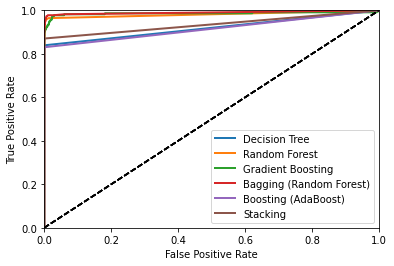

In [27]:
def plot_roc_curve(fpr, tpr, label):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

# Decision Tree
decision_tree.fit(X_train, y_train)
decision_tree_probs = decision_tree.predict_proba(X_test)[:, 1]
fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test, decision_tree_probs)
plot_roc_curve(fpr_dt, tpr_dt, 'Decision Tree')

# Random Forest
random_forest.fit(X_train, y_train)
random_forest_probs = random_forest.predict_proba(X_test)[:, 1]
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, random_forest_probs)
plot_roc_curve(fpr_rf, tpr_rf, 'Random Forest')

# Gradient Boosting
gradient_boosting.fit(X_train, y_train)
gradient_boosting_probs = gradient_boosting.predict_proba(X_test)[:, 1]
fpr_gb, tpr_gb, thresholds_gb = roc_curve(y_test, gradient_boosting_probs)
plot_roc_curve(fpr_gb, tpr_gb, 'Gradient Boosting')

# Bagging (Random Forest)
bagging_classifier.fit(X_train, y_train)
bagging_probs = bagging_classifier.predict_proba(X_test)[:, 1]
fpr_bag, tpr_bag, thresholds_bag = roc_curve(y_test, bagging_probs)
plot_roc_curve(fpr_bag, tpr_bag, 'Bagging (Random Forest)')

# Boosting (AdaBoost)
adaboost_classifier.fit(X_train, y_train)
adaboost_probs = adaboost_classifier.predict_proba(X_test)[:, 1]
fpr_ab, tpr_ab, thresholds_ab = roc_curve(y_test, adaboost_probs)
plot_roc_curve(fpr_ab, tpr_ab, 'Boosting (AdaBoost)')

# Stacking
stacking_X_test = pd.DataFrame({
    'DecisionTree': test_decision_tree_preds,
    'RandomForest': test_random_forest_preds,
    'GradientBoosting': test_gradient_boosting_preds
})
stacking_probs = stacking_classifier.predict_proba(stacking_X_test)[:, 1]
fpr_stack, tpr_stack, thresholds_stack = roc_curve(y_test, stacking_probs)
plot_roc_curve(fpr_stack, tpr_stack, 'Stacking')

plt.legend(loc='lower right')
plt.show()

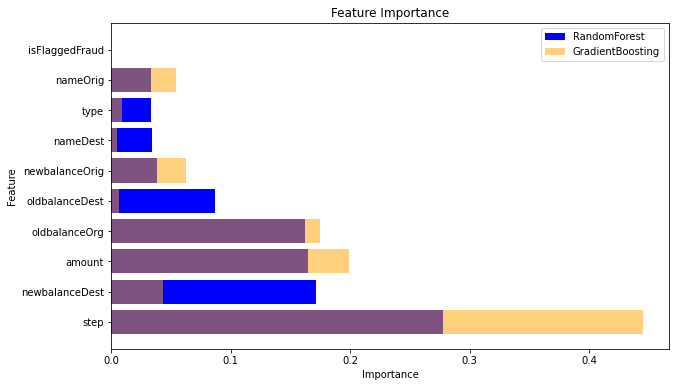

In [28]:
# Get feature importances for RandomForestClassifier
random_forest_feature_importances = random_forest.feature_importances_

# Get feature importances for GradientBoostingClassifier
gradient_boosting_feature_importances = gradient_boosting.feature_importances_

# Create a DataFrame to store feature importances
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'RandomForest': random_forest_feature_importances,
    'GradientBoosting': gradient_boosting_feature_importances
})

# Sort the DataFrame by importance
feature_importance_df = feature_importance_df.sort_values(by='RandomForest', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['RandomForest'], color='blue', label='RandomForest')
plt.barh(feature_importance_df['Feature'], feature_importance_df['GradientBoosting'], color='orange', alpha=0.5, label='GradientBoosting')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.legend()
plt.show()

# SAVE TRAINED MODEL

In [43]:
import joblib
from sklearn.tree import DecisionTreeClassifier
import os

# Create the directory
output_directory = 'FRAUD_DETECTION'
os.makedirs(output_directory, exist_ok=True)

#trained classifiers
decisiontree = DecisionTreeClassifier()
RandomForest_classifier = RandomForestClassifier()
Gradient_classifier = GradientBoostingClassifier()
Bagging_classifier = BaggingClassifier()
Boosting_classifier = AdaBoostClassifier()

# Define the list of base estimators for StackingClassifier
base_estimators = [
    ('decisiontree', decisiontree),
    ('RandomForest', RandomForest_classifier),
    ('Gradient', Gradient_classifier),
    ('Bagging', Bagging_classifier),
    ('Boosting', Boosting_classifier)
]

# Initialize the StackingClassifier with base estimators and final estimator
Stacking_classifier = StackingClassifier(estimators=base_estimators, final_estimator=decisiontree)

# Save the trained machine learning models
joblib.dump(decisiontree, 'FRAUD_DETECTION/Decision_Tree_model.pkl')
joblib.dump(RandomForest_classifier, 'FRAUD_DETECTION/Random_Forest_model.pkl')
joblib.dump(Gradient_classifier, 'FRAUD_DETECTION/Gradient_Boosting_model.pkl')
joblib.dump(Bagging_classifier, 'FRAUD_DETECTION/Bagging_Tree_model.pkl')
joblib.dump(Boosting_classifier, 'FRAUD_DETECTION/Boosting_Forest_model.pkl')
joblib.dump(Stacking_classifier, 'FRAUD_DETECTION/Stacking_Boosting_model.pkl')

['FRAUD_DETECTION/Stacking_Boosting_model.pkl']

# CREATING A PLOTLY DASH

In [ ]:
import dash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output
import pandas as pd
from sklearn.externals import joblib  # Use joblib to load the trained models

# LOAD TRAINED MODELS

In [ ]:
# Load the trained models
decision_tree = joblib.load('Decision_tree_model.pkl')
random_forest = joblib.load('Random_forest_model.pkl')
gradient_boosting = joblib.load('Gradient_boosting_model.pkl')
bagging_classifier = joblib.load('Bagging_classifier_model.pkl')
adaboost_classifier = joblib.load('Boosting_classifier_model.pkl')
stacking_classifier = joblib.load('Stacking_classifier_model.pkl')

# BUILD DASH APP

In [ ]:
app = dash.Dash(__name__)

# Define the layout of your dashboard
app.layout = html.Div([
    # Add components here
])

if __name__ == '__main__':
    app.run_server(debug=True)

In [ ]:
app.layout = html.Div([
    html.H1("Fraud Detection Dashboard"),
    dcc.Dropdown(
        id='model-dropdown',
        options=[
            {'label': 'Decision Tree', 'value': 'decision_tree'},
            {'label': 'Random Forest', 'value': 'random_forest'},
            {'label': 'Gradient Boosting', 'value': 'gradient_boosting'},
            {'label': 'Bagging (Random Forest)', 'value': 'bagging_classifier'},
            {'label': 'Boosting (AdaBoost)', 'value': 'adaboost_classifier'},
            {'label': 'Stacking', 'value': 'stacking_classifier'}
        ],
        value='decision_tree',
        clearable=False
    ),
    dcc.Input(id='amount-input', type='number', placeholder='Enter amount'),
    html.Button('Predict', id='predict-button'),
    html.Div(id='prediction-output')
])

In [ ]:
@app.callback(
    Output('prediction-output', 'children'),
    Input('model-dropdown', 'value'),
    Input('amount-input', 'value'),
    Input('predict-button', 'n_clicks')
)
def update_prediction(model_name, amount, n_clicks):
    if n_clicks is None:
        return ""

    # Retrieve the selected model
    selected_model = globals()[model_name]

    # Prepare input data for prediction
    input_data = pd.DataFrame({
        'amount': [amount]
        # Add other features based on your dataset
    })

    # Make predictions
    prediction = selected_model.predict(input_data)

    return f"Prediction: {prediction}"
